# Terraces in the first Movement of Sibelius Symphony No. 6

This is a demo project for oma.digital and omaPy.

## Tutorial

We compare tempo curves of different recordings.

Example:
http://localhost:8080/recording/show/187642

Let's see, if the system is running?

In [1]:
# python online?
print("Hello from python!")

Hello from python!


In [2]:
# Loading Beat Annotation Data from oma.digital
# import omapy library
from omapy import oma

# specify the oma cloud you are using
url = "http://localhost:8080/"
# specify your security token from your web account
token = "4fdnupfvk379b52n00m35n1s5jqtc31s"

# oma provides a handle to omapy API features via Login()
oma = oma.Login(url, token)

# use the variable oma, the handle, to call API functionality
# the function recording(id) provides access to the recording of given id
recording = oma.recording(187642)

# oma API objects provide a directory() function to fetch the data to a python dictionary
recording.dictionary()

{'abstract_music_part': {'id': 187709},
 'digital_audio': {'id': 187643},
 'id': 187642,
 'interpretation': {'id': 187708,
  'title': 'Herbert von Karajan, 1955, Philharmonia'},
 'title': 'Sibelius_Sym6_Karajan_PhilharmoniaO_1955_I_AudacityExport.wav'}

Example of recording.dictionary() output :
```
{'abstract_music_part': {'id': 187709},
 'digital_audio': {'id': 187643},
 'id': 187642,
 'interpretation': {'id': 187708,
  'title': 'Herbert von Karajan, 1955, Philharmonia'},
 'title': 'Sibelius_Sym6_Karajan_PhilharmoniaO_1955_I_AudacityExport.wav'}
```

* 'id' is the identifier of the recording
* 'title' is the title of the recording
* 'interpretation'.'id' is the identifier of the interpretation
* 'interpretation'.'title' is the title of the interpretation
* 'digital_audio'.'id' is a reference to the actual WAV audio file
* 'abstract_music_part'.'id' is a reference to interpretation details that can be described via standard music notation.

We stick with the id and the title of the recording for now.

Beat data in oma.digital is organized in so-called sessions (or annotation sessions). A recording may have many sessions.

We use an API call to get the list of sessions for our recording

In [3]:
sessions = recording.get_annotation_sessions()
sessions.dictionary()

[{'id': 187979,
  'title': 'Upload of Sibelius_Sym6_Karajan_1955_ganzt_fertig_I.csv'}]

Example of sessions.dictionary() output :
```
[{'id': 187979,
  'title': 'Upload of Sibelius_Sym6_Karajan_1955_ganzt_fertig_I.csv'}]
```
This is a list [] of directories {}

We stick with the id of the session and use another API call to fetch the data (the annotations or beats) of that session.

In [4]:
# take the id of the first session
my_session_id = sessions.dictionary()[0]["id"]

# provide the id of the desired session to fetch the annotation session
session = oma.annotation_session(my_session_id)
# let's store the dict representation of a session to a new variable session_data
session_data = session.dictionary()
# and take only the annotations (they describe the beats) form the session_data
annotations = session_data["annotations"]
# view the first 3 elements of annotations
annotations[0:3]

[{'barNumber': 1,
  'beatNumber': 1,
  'id': 187980,
  'momentOfPerception': 2.600634921},
 {'barNumber': 2,
  'beatNumber': 1,
  'id': 187981,
  'momentOfPerception': 5.026235828},
 {'barNumber': 3,
  'beatNumber': 1,
  'id': 187982,
  'momentOfPerception': 7.689795918}]

Example:
```
[{'barNumber': 1,
  'beatNumber': 1,
  'id': 187980,
  'momentOfPerception': 2.600634921},
 {'barNumber': 2,
  'beatNumber': 1,
  'id': 187981,
  'momentOfPerception': 5.026235828},
 {'barNumber': 3,
  'beatNumber': 1,
  'id': 187982,
  'momentOfPerception': 7.689795918}]
```
each annotation with given id describes the moment of perception of a given beat number at a given bar number

We are interested in the tempo.
The tempo per beat we define as 1/time per beat. Other definitions are possible, .e.g., beats per minute, but they are only proportionally different.

In [5]:
# loading some libraries for working with numbers and data
import pandas as pd
import numpy as np

# pandas is nice for processing table-like data in a structure called data frame
# search the web for pandas
data_frame = pd.DataFrame(annotations)
# using the head() function to show the first couple of records
data_frame.head()

,barNumber,beatNumber,id,momentOfPerception
0,1,1,187980,2.600635
1,2,1,187981,5.026236
2,3,1,187982,7.689796
3,4,1,187983,10.759184
4,5,1,187984,13.583673


We want to know the duration of each bar, so we filter out eyerything that is not a "one beat".

In [6]:
# this creates a true/false filter on the beatNumber
one_beats = data_frame['beatNumber'] == 1
# using this filter, we select only True rows from the data_frame
one_beats_only = data_frame[one_beats]
one_beats_only.head()

,barNumber,beatNumber,id,momentOfPerception
0,1,1,187980,2.600635
1,2,1,187981,5.026236
2,3,1,187982,7.689796
3,4,1,187983,10.759184
4,5,1,187984,13.583673


In [7]:
# add another column to the data frame.
# how big is our data frame?
# take one column and use shape to get the number of row

column_shape = one_beats_only['id'].shape
# use this shape with np.zeros() to create a column containing zeros
# and apply this column to the data frame with title "barDuration"
one_beats_only['barDuration'] = np.zeros(column_shape)
one_beats_only.head()

,barNumber,beatNumber,id,momentOfPerception,barDuration
0,1,1,187980,2.600635,0.0
1,2,1,187981,5.026236,0.0
2,3,1,187982,7.689796,0.0
3,4,1,187983,10.759184,0.0
4,5,1,187984,13.583673,0.0


In [8]:
# iterate the table to calculate the barDuration. skip the last row
# because the last beat's duration cannot be calculated
for row_index in range(column_shape[0] - 1):
    #current_bar_start = one_beats_only["momentOfPerception"][row_index]
    current_bar_start = one_beats_only.iloc[row_index, 3]
    next_bar_start = one_beats_only.iloc[row_index + 1, 3]
    duration = next_bar_start - current_bar_start
    #write back result
    one_beats_only.iloc[row_index, 4] = duration

one_beats_only.head()

,barNumber,beatNumber,id,momentOfPerception,barDuration
0,1,1,187980,2.600635,2.425601
1,2,1,187981,5.026236,2.663560
2,3,1,187982,7.689796,3.069388
3,4,1,187983,10.759184,2.824490
4,5,1,187984,13.583673,2.939501


In [9]:
# add another column for the inverse value.
# this time using some numpy features.
# search the web for numpy

# "slice" the column with the barDuration and convert it to a numpy array
durations = one_beats_only["barDuration"].to_numpy()
tempos = np.reciprocal(durations)
# add the tempos. np arrays can be added as columns
one_beats_only["barTempo"] = tempos
one_beats_only.head()

/home/martin/Workspace/oma/jupyter-omaapi/JUPYTER/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  import sys


,barNumber,beatNumber,id,momentOfPerception,barDuration,barTempo
0,1,1,187980,2.600635,2.425601,0.412269
1,2,1,187981,5.026236,2.663560,0.375437
2,3,1,187982,7.689796,3.069388,0.325798
3,4,1,187983,10.759184,2.824490,0.354046
4,5,1,187984,13.583673,2.939501,0.340194


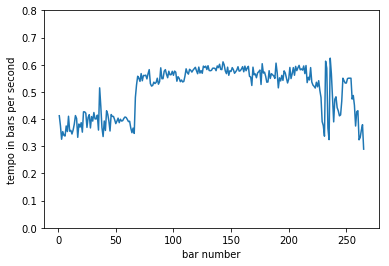

In [17]:
# plot the tempo curve
# x and y axes can be numpy arrays too
x_axis = one_beats_only["barNumber"].to_numpy()
y_axis = one_beats_only["barTempo"].to_numpy()

# import plotting library
import matplotlib.pyplot as plt
# search the web for matplotlib
fig, ax = plt.subplots()
ax.set_xlabel("bar number")
ax.set_ylabel("tempo in bars per second")
ax.set_ylim([0,0.8])
ax.plot(x_axis, y_axis)